## Week 3 Lab exercises

In this week we will explore the concept of object oreinted programming (OOP) with classes, and the numerical solution of simple non linear ordinary differential equations (ODEs). 

In [1]:
# first we import the libraries we need
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# The following lines makes the plots appear inline in the notebook
%matplotlib inline

### ACTIVITY 1: 
I have written a class below for a Point object, which encapsulates the idea of a point and things we might want to do to it. 

Here you will write another class object for a Rectangle. You should consider and implement the following points:

1. What is the minimum information that is needed to fully describe a rectangle and its position in space? Assume for simplicity that its edges are aligned with the x and y axes.

2. Implement functions to:

    a. reflect the rectangle in the x and y axes
    
    b. grow the rectangle by an amount in x and y with the bottom left corner fixed
    
    c. grow the rectangle by an amount in x and y with the top right corner fixed
    
    d. plot the rectangle


3. What should be checked here? Can you add some asserts? Do you need to test the functions?

4. Would some of the methods needed make more sense to be implemented in the Points class instead of the Rectangle class? If so go ahead and edit it!

Point  P is 0 2.0
Point  Q is 4.0 7.5
Point  R is 4.0 9.5
Distance is  6.800735254367722
42


(0, 2.0)

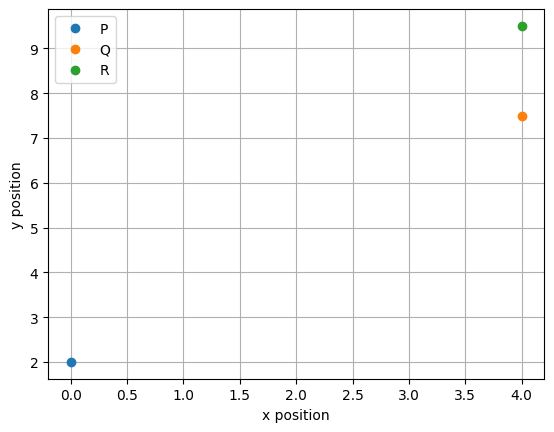

In [2]:
# Points class

class Point :
    """
    Represents a point in a 2D space

    attributes: x, y, name

    """

    # constructor function
    # The double underscores indicate a private method or variable
    # not to be accessed outside the class (in principle)
    def __init__(self, x=0.0, y=0.0, name = ""):
        self.x = x
        self.y = y
        self.name = name
        self.__private_variable = 42

    def __add__(self, other):
        new_point = Point(self.x+other.x, self.y+other.y)
        return new_point

    def print_point(self):
        print("Point ", self.name, "is", self.x, self.y)

    # Note that we don't use self here so don't need to pass it in
    # (This is a static function - it does not require an instance of the class)
    def calculate_distance_between_two_points(A, B):
        return np.sqrt((A.x - B.x)**2.0 + (A.y - B.y)**2.0)

    def move_point(self,dx,dy):
        self.x += dx
        self.y += dy

    def plot_point(self, ax):
        ax.plot(self.x, self.y, 'o', label=self.name)

    def update_name(self, new_name):
        self.name = new_name

    def __repr__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ")"


# Some examples of using the Points class
first_point = Point(1.0,2.0,"P")
first_point.x = 0

first_point.print_point()
# print(first_point.__private_variable) # Expect: AttributeError: 'Point' object has no attribute '__private_variable'


second_point = Point(3.0,5.5,"Q")
second_point.move_point(1.0, 2.0)
second_point.print_point()

third_point = first_point + second_point
third_point.update_name("R")
third_point.print_point()

# Use the static function
distance = Point.calculate_distance_between_two_points(first_point,second_point)
print("Distance is ", distance)

plt.plot()
plt.grid()
plt.xlabel("x position")
plt.ylabel("y position")
ax = plt.gcf().gca()
first_point.plot_point(ax)
second_point.plot_point(ax)
third_point.plot_point(ax)
plt.legend()

# Try to access the private variable, even though you shouldn't
#print(first_point.__private_variable) # This won't work - try uncommenting it
print(first_point._Point__private_variable) # This will

# Can get info on the new class - uncomment to see this
# Point?
# help(Point)

first_point

In [3]:
# class ReadOnlyClass(type):
#     def __setattr__(self, name, value):
#         raise ValueError(name)

# class A(object, metaclass=ReadOnlyClass):
#     foo = "don't change me"

# a = A()
# a.foo = "asd"
# print(a.foo)

In [4]:
class C:
    def __init__(self):
        self._x = None

    @property
    def x(self):
        """I'm the 'x' property."""
        print("getter of x called")
        return self._x

    @x.setter
    def x(self, value):
        print("setter of x called")
        self._x = value

    @x.deleter
    def x(self):
        print("deleter of x called")
        del self._x


c = C()
c.x = 'foo'  # setter called
foo = c.x    # getter called
del c.x      # deleter called

setter of x called
getter of x called
deleter of x called


In [5]:
# # Rectangle class

# # UPDATE ME!

# # I have written a class below for a Point object, which encapsulates the idea of a point and things we might want to do to it.

# # Here you will write another class object for a Rectangle. You should consider and implement the following points:

# #     What is the minimum information that is needed to fully describe a rectangle and its position in space? Assume for simplicity that its edges are aligned with the x and y axes.

# #     Implement functions to:

# #     a. reflect the rectangle in the x and y axes

# #     b. grow the rectangle by an amount in x and y with the bottom left corner fixed

# #     c. grow the rectangle by an amount in x and y with the top right corner fixed

# #     d. plot the rectangle

# #     What should be checked here? Can you add some asserts? Do you need to test the functions?

# #     Would some of the methods needed make more sense to be implemented in the Points class instead of the Rectangle class? If so go ahead and edit it!


# class Rectangle :
#     """
#     Represents a rectangle in a 2D space

#     The edges are aligned with the x and y axes.

#     attributes: bottom_left_corner, upper_right_corner, name

#     """

#     # constructor function
#     # The double underscores indicate a private method or variable
#     # not to be accessed outside the class (in principle)
#     # TODO: Should I always declare default values even when users have to specify them?
#     # dx and dy must be non-negative
#     # Default: single point (dx = dy = 0).
#     # Allowing zero area (min(dx, dy) = 0).
#     def __init__(self, bottom_left_corner=Point(),
#                  dx=0, dy=0,
#                  name = ""):
#         self.bottom_left_corner = deepcopy(bottom_left_corner)
#         self.dx = dx
#         self.dy = dy
#         self.name = name

#     @property
#     def dx(self): return self.__dx

#     @property
#     def dy(self): return self.__dy

#     @property
#     def bottom_left_corner(self): return self.__bottom_left_corner

#     @dx.setter
#     def dx(self, dx):
#         assert type(dx) == float, f"dx should be float but {type(dx)} is passed"
#         assert dx >= 0, f"dx should be non-negative but {dx} is passed"
#         self.__dx = dx

#     @dy.setter
#     def dy(self, dy):
#         assert type(dy) == float, f"dy should be float but {type(dy)} is passed"
#         assert dy >= 0, "dy should be non-negative"
#         self.__dy = dy

#     @bottom_left_corner.setter
#     def bottom_left_corner(self, bottom_left_corner):
#         assert type(bottom_left_corner) == Point, "bottom_left_corner should be a Point"
#         self.__bottom_left_corner = deepcopy(bottom_left_corner)


#     def print_rectangle(self) -> None:
#         print("Rectangle ", self.name, " is ", self.__repr__(), sep="")

#     # def reflect_over_x_axis(self) -> Rectangle:
#     #     result = deepcopy(self)
#     #     result.__bottom_left_corner.move_point(-1, -1)
#     #     return result

#     # def reflect_over_y_axis(self) -> Rectangle:
#     #     pass

#     # # Note that we don't use self here so don't need to pass it in
#     # # (This is a static function - it does not require an instance of the class)
#     # def calculate_distance_between_two_points(A, B) :
#     #     return np.sqrt((A.x - B.x)**2.0 + (A.y - B.y)**2.0)

#     # def plot_point(self, ax) :
#     #     ax.plot(self.x, self.y, 'o', label=self.name)

#     def __repr__(self):
#         return "(bottom_left_corner=" + str(self.bottom_left_corner) + ", dx=" + str(x) + ", dy=" + str(dy) + ")"


# # Some examples of using the Points class
# first_point = Point(1.0,2.0,"P")
# first_point.print_point()

# second_point = Point(3.0,5.5,"Q")
# second_point.move_point(1.0, 2.0)
# second_point.print_point()

# third_point = first_point + second_point
# third_point.update_name("R")
# third_point.print_point()

# good_rec = Rectangle(first_point, 1)
# # good_rec = Rectangle(first_point, -1.0)
# good_rec = Rectangle(first_point, 1)

# print(good_rec)
# good_rec.dx = -1

# good_rec = Rectangle(first_point, second_point, "Good Rec")
# print(good_rec)
# new_rec = good_rec.reflect_over_x_axis()
# print(new_rec)

# # print(rec.__bottom_left_corner)
# print(rec.bottom_left_corner)

# good_rec.print_rectangle()

# # first_point = Point(10.0,20.0,"P")
# first_point.x = 10.0
# print(good_rec)

# good_rec.bottom_left_corner = first_point


# good_rec._bottom_left_corner = first_point
# print(good_rec)


# # bad_rec = Rectangle(second_point, first_point, "Bad Rec") # This should throws an error.
# # print(bad_rec)


# # Use the static function
# distance = Point.calculate_distance_between_two_points(first_point,second_point)
# print("Distance is ", distance)

# plt.plot()
# plt.grid()
# plt.xlabel("x position")
# plt.ylabel("y position")
# ax = plt.gcf().gca()
# first_point.plot_point(ax)
# second_point.plot_point(ax)
# third_point.plot_point(ax)
# plt.legend()

# # Try to access the private variable, even though you shouldn't
# #print(first_point.__private_variable) # This won't work - try uncommenting it
# print(first_point._Point__private_variable) # This will

# # Can get info on the new class - uncomment to see this
# # Point?


### ACTIVITY 2: 

Now create a Square class that has the same functionality as the rectangle class, but that in addition has the ability to calculate its own area. You are not allowed to modify the Rectangle class.

_HINT: Do you really need to write a whole new function from scratch? What about inheritance?_


In [6]:
# Square class

# UPDATE ME

### ACTIVITY 3:

Now we wil consider a simpled coupled ODEs: the Lotka-Volterra equations describe predator-prey relations, where some species $x$ (e.g. a fox) eats another species $y$ (e.g. rabbits), and each population grows by breeding at a rate proportional to its number. The resulting evolution is described by the following first order, autonomous, non linear, coupled system of ordinary differential equations:

$\frac{dx}{dt} = ax - bxy$

$\frac{dy}{dt} = -cy + dxy$

What parts or features of the differential equation tell us that it is:
1. First order
2. Autonomous
3. Non linear
4. Coupled 

?

Answers: ... UPDATE ME!

In [7]:
# Exercise 4 suggestion: 1st do it in Excel
# (a) Calculate the repayment amount
# (b) Calculate APR

### ACTIVITY 4:

The following code solves the Logistic Equation 

$\frac{dy}{dt} = y (1 - y)$

Using a simple explicit integration and the scipy function solve_ivp() which used Runge-Kutta 4th/5th order time integration. Copy it and update it to solve instead the Lotka-Volterra equations. 

Note the following:

1. Why do I substract delta_t when calculating the vector of t_solution points?
2. the solve_ivp method uses the labels t and y for the independent and dependent variables. The y value is assumed to be a vector, allowing you to solve for multiple dependent variables at once, e.g. you can make it np.array([x,y])

In [8]:
# # Solve the 1d logistic equation from class
# from scipy.integrate import solve_ivp

# # Note that the function has to take t as the first argument and y as the second
# def calculate_logistic_dydt(t, y):
#     """Returns the gradient dx/dt for the logistic equation"""
#     dydt = y*(1 - y)
#     return dydt

# max_time = 10.0
# N_time_steps = 25
# delta_t = max_time / N_time_steps
# t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable
# y0 = np.array([0.5]) # an initial condition, y(0) = y0, note it needs to be an array

# solution = solve_ivp(calculate_logistic_dydt, [0,max_time], y0,
#                         method='RK45', t_eval=t_solution)

# plt.grid()
# plt.xlabel("t", fontsize=16)
# plt.ylabel("y", fontsize=16)
# plt.plot(solution.t, solution.y[0], 'o', label="solve_ivp")

# # Now do it the "cheap" way
# # increase the number of steps to see how the solution changes
# y_solution = np.zeros_like(t_solution)
# y_solution[0] = y0
# for itime, time in enumerate(t_solution) :
#     if itime > 0 :
#         dydt = calculate_logistic_dydt(time, y_solution[itime-1])
#         y_solution[itime] = y_solution[itime-1] + dydt * delta_t

# plt.plot(t_solution, y_solution, '-.',label="cheap method")

# # Now plot the true solution
# A = 1.0/y0 - 1.0
# y_true = 1.0 / (1.0 + A * np.exp(-t_solution))
# plt.plot(t_solution, y_true, '-', label="true solution")
# plt.legend(loc='best');

In [15]:
# help(np.linspace)
# # linspace(
# #   start, stop, num=50,
# #   endpoint=True, retstep=False, dtype=None, axis=0
# # )

In [18]:
# help(solve_ivp)
# # solve_ivp(
# #   fun, t_span, y0, method='RK45', t_eval=None,
# #   dense_output=False, events=None, vectorized=False, args=None, **options
# # )

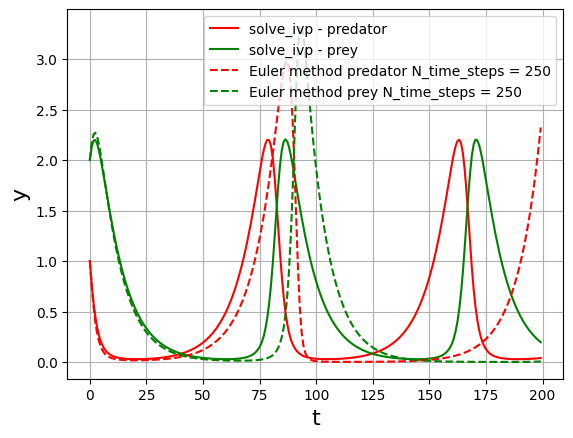

In [32]:
# Your solution here for the predator-prey equations !

# UPDATE ME!
# Solve the 1d logistic equation from class
from scipy.integrate import solve_ivp

# Note that the function has to take t as the first argument?
def calculate_predator_prey_dxdt_and_dydt(
    t,
    x_and_y):
    """
    Returns the gradient dx/dt for the logistic equation

    Parameters
    ----------
    t : ndarray
        Times (the independent variable)???
    x_and_y : ndarray
        Predators and Prey

    """
    # Set the values of the ecosystem. TODO: How to choose these values?
    a = 0.1
    b = 0.2
    c = 0.1
    d = 0.2

    x = x_and_y[0]
    y = x_and_y[1]

    dxdt_and_dydt = np.zeros_like(x_and_y)
    dxdt_and_dydt[0] = a * x - b * x * y
    dxdt_and_dydt[1] = -c * y + d * x * y

    return dxdt_and_dydt


# TODO: How to choose these values?
max_time = 200.0
N_time_steps = 250
delta_t = max_time / N_time_steps
t_solution = np.linspace(
    start=0.0,
    stop=max_time-delta_t,
    num=N_time_steps) # values of independent variable
# Basically, `t_solution` is an array of time steps
# from 0 to `max_time` with `N_time_steps` steps.

# TODO: How to choose these initial values?
x0_and_y0 = np.array([1.0, 2.0]) # an initial condition, y(0) = y0, note it needs to be an array



solution = solve_ivp(
    fun=calculate_predator_prey_dxdt_and_dydt,
    t_span=[0,max_time],
    y0=x0_and_y0,
    method='RK45',
    t_eval=t_solution
)

plt.grid()
plt.xlabel("t", fontsize=16)

plt.ylabel("y", fontsize=16)

plt.plot(
    solution.t,
    solution.y[0],
    'r-',
    label="solve_ivp - predator"
)
plt.plot(
    solution.t,
    solution.y[1],
    'g-',
    label="solve_ivp - prey"
)

# Now do it using Euler's method
# increase the number of steps to see how the solution changes
y_solution = np.zeros([N_time_steps, 2])
y_solution[0][:] = x0_and_y0
for itime, time in enumerate(t_solution) :
    if itime > 0 :
        dydt = calculate_predator_prey_dxdt_and_dydt(
            time,
            y_solution[itime-1][:]
        )
        y_solution[:][itime] = y_solution[itime-1][:] + dydt * delta_t

plt.plot(
    t_solution,
    y_solution[:,0],
    'r--',
    label=f"Euler method predator N_time_steps = {N_time_steps}"
)
plt.plot(
    t_solution,
    y_solution[:,1],
    'g--',
    label=f"Euler method prey N_time_steps = {N_time_steps}"
)

plt.legend(loc='best');

In [38]:
# Allow user to interact and adjust the number of steps
# in Euler's method to see how the solution changes


import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets



# Create an interactive function to update the plot
def update_plot(N_time_steps):
    delta_t = max_time / N_time_steps
    t_solution = np.linspace(0.0, max_time - delta_t, N_time_steps)

    solution = solve_ivp(
        fun=calculate_predator_prey_dxdt_and_dydt,
        t_span=[0, max_time],
        y0=x0_and_y0,
        method='RK45',
        t_eval=t_solution
    )

    plt.clf()
    plt.grid()
    plt.xlabel("t", fontsize=16)
    plt.ylabel("y", fontsize=16)

    plt.plot(solution.t, solution.y[0], 'r-', label="solve_ivp - predator")
    plt.plot(solution.t, solution.y[1], 'g-', label="solve_ivp - prey")

    y_solution = np.zeros([N_time_steps, 2])
    y_solution[0][:] = x0_and_y0
    for itime, time in enumerate(t_solution):
        if itime > 0:
            dydt = calculate_predator_prey_dxdt_and_dydt(time, y_solution[itime - 1][:])
            y_solution[:][itime] = y_solution[itime - 1][:] + dydt * delta_t

    plt.plot(t_solution, y_solution[:, 0], 'r--', label=f"Euler method predator N_time_steps = {N_time_steps}")
    plt.plot(t_solution, y_solution[:, 1], 'g--', label=f"Euler method prey N_time_steps = {N_time_steps}")

    plt.legend(loc='best')

# Create an interactive widget for N_time_steps
interact(
  update_plot,
  N_time_steps=widgets.IntSlider(
    min=100,
    max=10000,
    step=50,
    value=100
  )
);



interactive(children=(IntSlider(value=100, description='N_time_steps', max=10000, min=100, step=50), Output())…

### ACTIVITY 5:

Find the equilibrium value of rabbits and foxes such that you do not get oscillations.

_HINT: You can do this by trying different initial values of the rabbits and foxes, but it may help to also plot the solutions of x versus y for different values of the initial conditions and identify if there is a trend_

In [10]:
# Plot some solutions of x versus y

# HINT: plt.plot(solution.y[0], solution.y[1], '--', label="x0, y0 = ??")

### ACTIVITY 6:

If you <u>double the resolution</u> in the <u>simple integrator</u>, what happens to the error in the solution <b>compared to `solve_ivp`</b>? Why? How could you improve this behaviour?

In [11]:
# # Compare the errors here

# # HINT:
# plt.plot(
#   solution.t,
#   solution.y[0] - y_solution,
#   '--',
#   label="error versus solve_ivp, dt = ??"
# )

### ACTIVITY 7:

The predator - prey equations have been cast above in a _functional coding_ style. Can you imagine a way to cast them in a more OOP way?

_HINT: There are several ways this could be done, but consider writing an Ecosystem class - what would be the attributes and methods that would live in such a class?_

OPTIONAL: Implement it!

A: UPDATE ME!

In [12]:
# Implementation of the Ecosystem class (OPTIONAL)
